# **Baseline Notebook**



---
## Setup Environment

In [3]:
# DO NOT MODIFY THE CODE IN THIS CELL
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

at = AtFolder(
    course_code=36106,
    assignment="AT2",
)
at.run()

import warnings
warnings.simplefilter(action='ignore')

ERROR: Could not install packages due to an OSError: [WinError 5] 拒绝访问。: 'C:\\Users\\brohao\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~5learn\\linear_model\\_cd_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



You can now save your data files in: c:\Users\brohao\Desktop\UTS\36106\ClassificationModels-36106-AT2\36106\assignment\AT2\data


---
## Student Information

In [ ]:
# <Student to fill this section and then remove this comment>
student_name = ""
student_id = ""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h1", key='student_name', value=student_name)

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h1", key='student_id', value=student_id)

---
## 0. Python Packages

### 0.a Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [ ]:
# <Student to fill this section and then remove this comment>

### 0.b Import Packages

In [1]:
# <Student to fill this section and then remove this comment>
import pandas as pd
import altair as alt

---
## A. Assess Baseline Model

In [4]:
# DO NOT MODIFY THE CODE IN THIS CELL
# Load data
try:
  X_train = pd.read_csv(at.folder_path / 'X_train.csv')
  y_train = pd.read_csv(at.folder_path / 'y_train.csv')

  X_val = pd.read_csv(at.folder_path / 'X_val.csv')
  y_val = pd.read_csv(at.folder_path / 'y_val.csv')

  X_test = pd.read_csv(at.folder_path / 'X_test.csv')
  y_test = pd.read_csv(at.folder_path / 'y_test.csv')
except Exception as e:
  print(e)

### A.1 Generate Predictions with Baseline Model

In [5]:
# <Student to fill this section and then remove this comment>
# === Baseline: Multinomial Logistic Regression ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, f1_score, balanced_accuracy_score,
    confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
)

# 1) Encode target (fit on train only) / 仅在训练集拟合标签编码器
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train['credit_rating'].astype(str))
y_val_enc   = le.transform(y_val['credit_rating'].astype(str))
y_test_enc  = le.transform(y_test['credit_rating'].astype(str))
class_names = list(le.classes_)

# 2) Train baseline / 训练基线模型（不设类权重，真实零起点）
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train_enc)

LogisticRegression(max_iter=1000, multi_class='multinomial')

### A.2 Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


=== Validation ===
Macro-F1: 0.5875
Balanced Acc: 0.5738
Macro ROC-AUC (OvR): 0.7803

Classification Report:
               precision    recall  f1-score   support

        Good     0.5704    0.4955    0.5304       335
        Poor     0.6402    0.4717    0.5432       547
    Standard     0.6342    0.7543    0.6891       993

    accuracy                         0.6256      1875
   macro avg     0.6150    0.5738    0.5875      1875
weighted avg     0.6246    0.6256    0.6181      1875



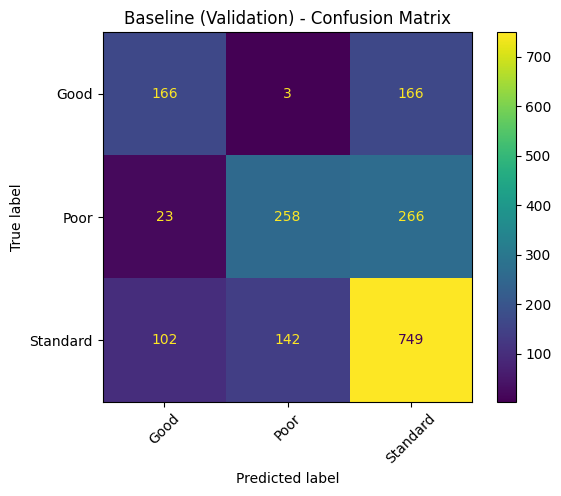


=== Test ===
Macro-F1: 0.5986
Balanced Acc: 0.5858
Macro ROC-AUC (OvR): 0.7870

Classification Report:
               precision    recall  f1-score   support

        Good     0.5788    0.5030    0.5382       336
        Poor     0.6359    0.5046    0.5627       547
    Standard     0.6475    0.7500    0.6950       992

    accuracy                         0.6341      1875
   macro avg     0.6207    0.5858    0.5986      1875
weighted avg     0.6318    0.6341    0.6283      1875



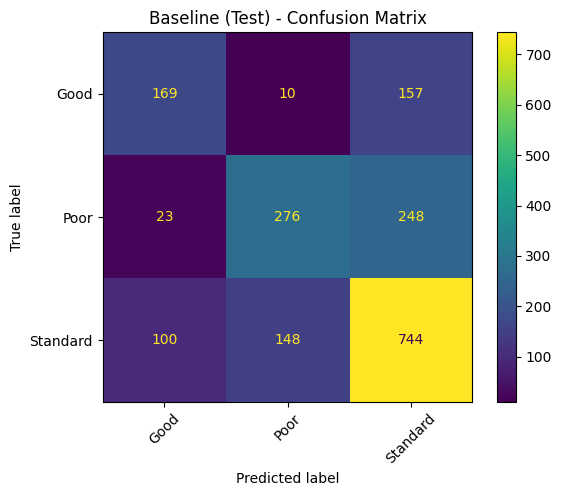

In [6]:
# <Student to fill this section and then remove this comment>
# 3) Validate / 验证集评估
val_pred = clf.predict(X_val)
val_proba = clf.predict_proba(X_val)
print("=== Validation ===")
print("Macro-F1:", f"{f1_score(y_val_enc, val_pred, average='macro'):.4f}")
print("Balanced Acc:", f"{balanced_accuracy_score(y_val_enc, val_pred):.4f}")
print("Macro ROC-AUC (OvR):", f"{roc_auc_score(y_val_enc, val_proba, multi_class='ovr', average='macro'):.4f}")
print("\nClassification Report:\n", classification_report(y_val_enc, val_pred, target_names=class_names, digits=4))
ConfusionMatrixDisplay(confusion_matrix(y_val_enc, val_pred), display_labels=class_names).plot(xticks_rotation=45)
plt.title("Baseline (Validation) - Confusion Matrix"); plt.show()

# 4) Test (one-shot) / 测试集一次性报告
test_pred = clf.predict(X_test)
test_proba = clf.predict_proba(X_test)
print("\n=== Test ===")
print("Macro-F1:", f"{f1_score(y_test_enc, test_pred, average='macro'):.4f}")
print("Balanced Acc:", f"{balanced_accuracy_score(y_test_enc, test_pred):.4f}")
print("Macro ROC-AUC (OvR):", f"{roc_auc_score(y_test_enc, test_proba, multi_class='ovr', average='macro'):.4f}")
print("\nClassification Report:\n", classification_report(y_test_enc, test_pred, target_names=class_names, digits=4))
ConfusionMatrixDisplay(confusion_matrix(y_test_enc, test_pred), display_labels=class_names).plot(xticks_rotation=45)
plt.title("Baseline (Test) - Confusion Matrix"); plt.show()

In [ ]:
# Provide some explanations on why you believe the performance metrics you chose is appropriate
performance_metrics_explanations = """
本任务是三分类（Good / Poor / Standard），且类别分布不均衡：Standard 占比超过一半，Good 只有不到 20%。如果只用准确率，会高估模型的表现，因为它更容易预测多数类。
因此，我选择 macro-F1 和 balanced accuracy 作为主要指标：

macro-F1：分别计算每一类的 F1 分数并取平均，保证少数类（如 Good）与多数类同等重要。

balanced accuracy：对每一类的召回率取平均，避免模型只关注多数类。
同时，我也报告了 分类报告（precision / recall / F1 by class） 和 混淆矩阵，帮助分析错误的模式。模型输出概率时，我补充了 macro ROC-AUC (OvR)，它可以反映整体的区分能力。
This is a three-class task (Good / Poor / Standard) with class imbalance: Standard is more than half, while Good is less than 20%. If we only use accuracy, the result will be misleading, because it favors the majority class.
Therefore, I chose macro-F1 and balanced accuracy as the main metrics:

macro-F1: calculates F1 for each class and takes the average, giving equal weight to minority and majority classes.

balanced accuracy: averages recall across classes, so the model cannot focus only on the dominant class.
I also report the classification report (precision / recall / F1 by class) and the confusion matrix to analyze error patterns. When probability outputs are available, I add macro ROC-AUC (OvR), which shows the overall discrimination ability.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

### A.3 Baseline Model Performance

> Provide some explanations on model performance


In [ ]:
# <Student to fill this section and then remove this comment>

In [ ]:
# Provide some explanations on model performance
baseline_performance_explanations = """
在验证集上，macro-F1 = 0.588，balanced accuracy = 0.574，macro ROC-AUC = 0.780；在测试集上，macro-F1 = 0.599，balanced accuracy = 0.586，macro ROC-AUC = 0.787。整体来看，逻辑回归的性能中等。

从分类报告可以看到：

Good 类的召回率最低（约 0.50），说明模型对优质客户的识别不足。

Poor 类也存在召回率偏低的问题（约 0.47–0.50）。

Standard 类的召回率最高（0.75 左右），这与其占比最多相一致。

业务含义：模型倾向于预测多数类（Standard），导致一部分 Good 和 Poor 被误判为 Standard。对于业务来说，这意味着：

优质客户被低估 → 无法获得合适的信用额度或优惠利率 → 收益损失和客户满意度下降。

风险客户被高估 → 银行可能在不知情的情况下发放更高额度 → 增加违约风险。

因此，Baseline 给出了一个可解释的起点。它展示了类别不均衡和线性模型的局限性。后续实验需要通过非线性方法或集成模型来提升 minority 类（Good, Poor）的召回率。

English Answer:
On the validation set, macro-F1 = 0.588, balanced accuracy = 0.574, macro ROC-AUC = 0.780. On the test set, macro-F1 = 0.599, balanced accuracy = 0.586, macro ROC-AUC = 0.787. Overall, the logistic regression model shows medium performance.

From the classification report:

Good class has the lowest recall (~0.50), meaning the model struggles to identify prime customers.

Poor class also has low recall (~0.47–0.50).

Standard class has the highest recall (~0.75), which is consistent with its majority share.

Business impact: the model favors the majority class (Standard), so some Good and Poor are misclassified as Standard. For the business:

Good customers underestimated → they do not get proper credit limits or lower rates → loss of revenue and lower satisfaction.

Poor customers overestimated → bank may offer higher credit than safe → higher risk of default.

Therefore, the baseline gives a clear and interpretable starting point. It shows the limits of linear models under imbalance. Next experiments will test non-linear and ensemble methods to improve recall for minority classes (Good, Poor).
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='baseline_performance_explanations', value=baseline_performance_explanations)